In [6]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# DataSet Description 

* There are 14 attributes
* --------------------------------
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
* -- Value 0: typical angina
* -- Value 1: atypical angina
* -- Value 2: non-anginal pain
* -- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* -- Value 0: normal
* -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* -- Value 0: upsloping
* -- Value 1: flat
* -- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: Thalessemia
    * 0 = normal; 1 = fixed defect; 2 = reversable defect
* condition: 0 = no disease, 1 = disease

In [7]:
data = pd.read_csv('D:\Internship-1\CodeClause\Task\Task-3 Heart_Disease\heart_cleveland_upload.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [10]:
data['condition'].unique()

array([0, 1], dtype=int64)

In [11]:
data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

<Axes: >

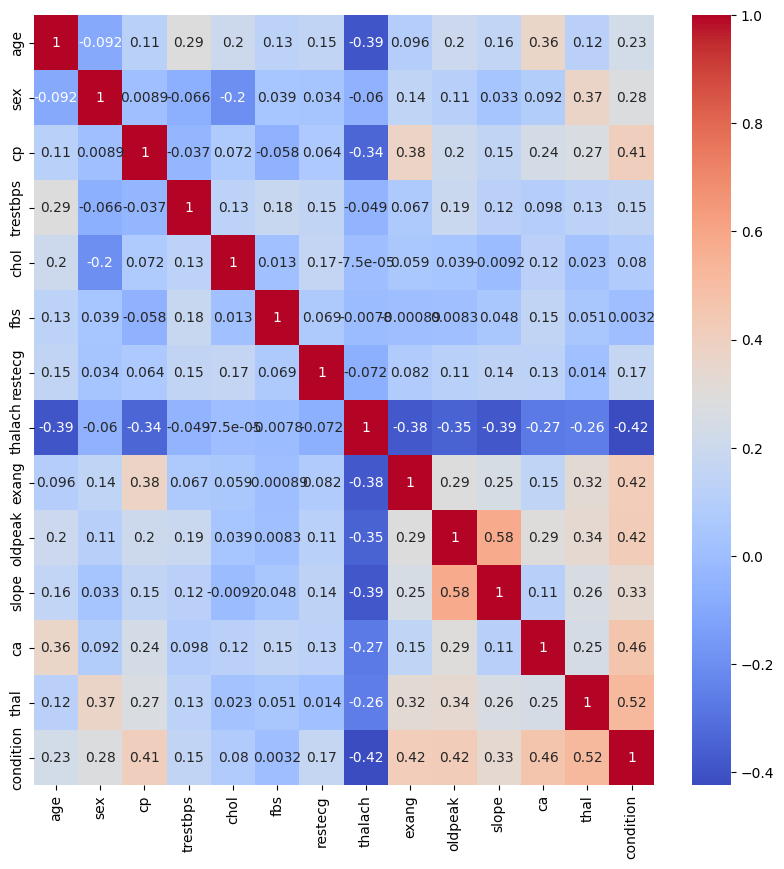

In [12]:
plt.figure(figsize=(10,10))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', cbar=True)

In [13]:
print(data.corr()['condition'].abs().sort_values(ascending=False))

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
thalach      0.423817
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
Name: condition, dtype: float64


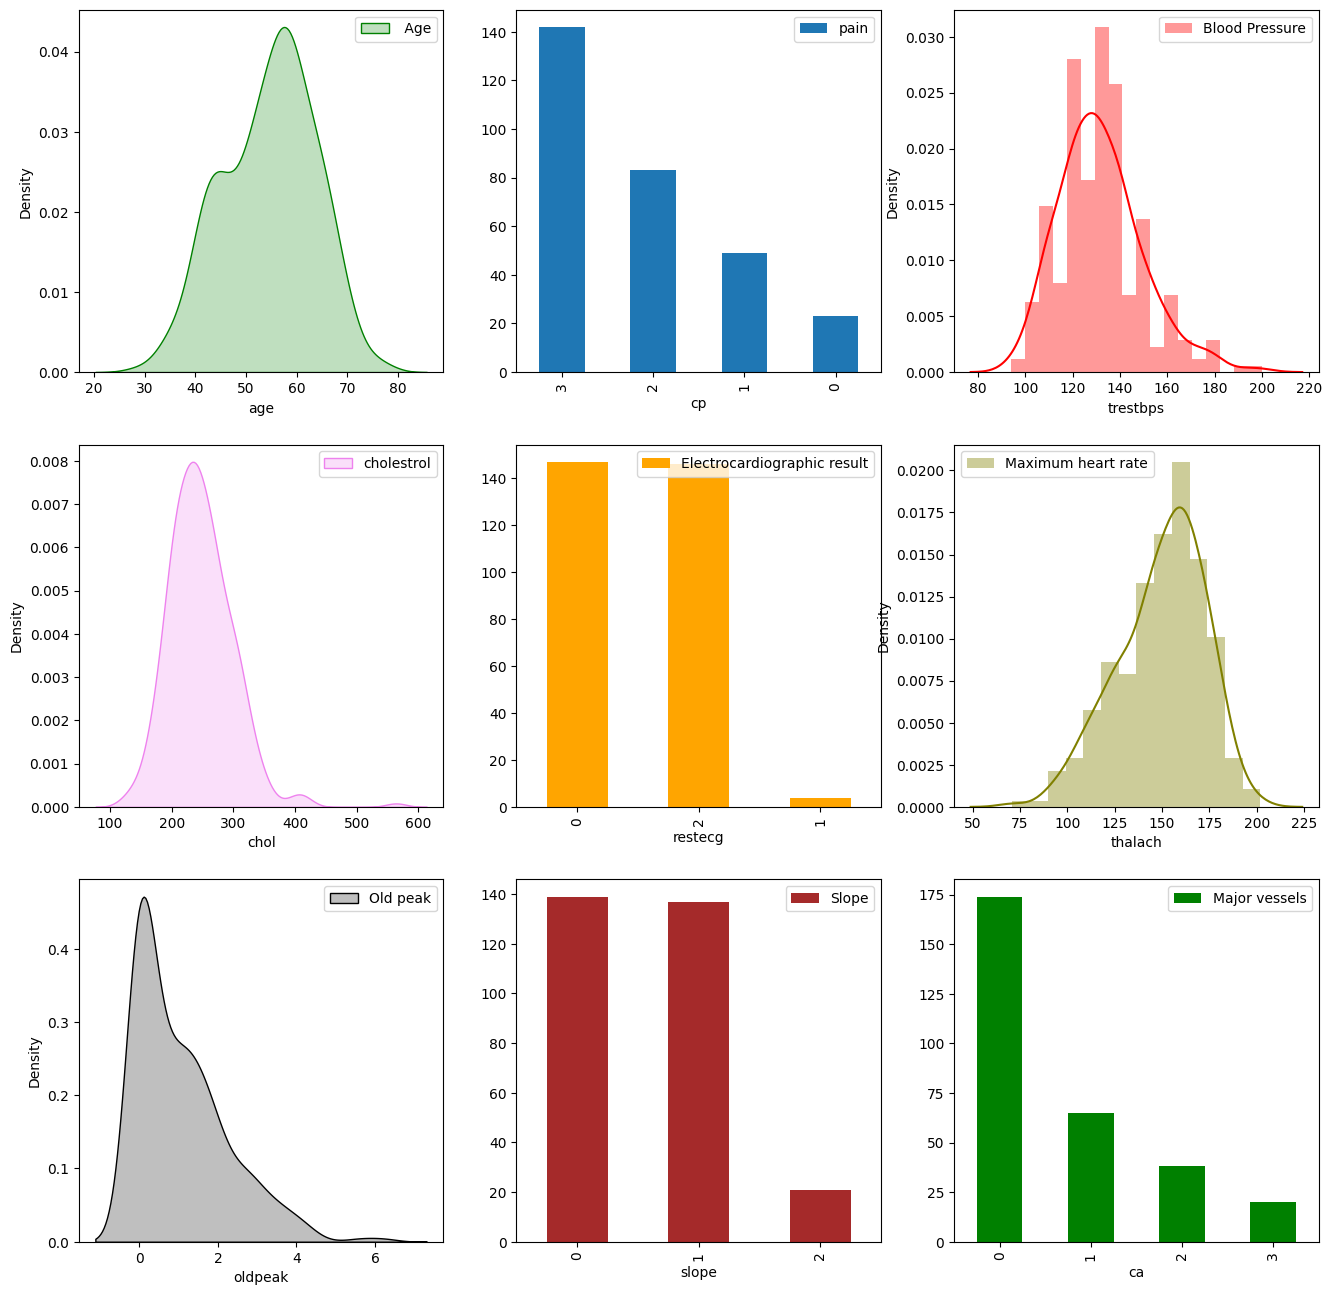

In [14]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(3,3,1)
sns.kdeplot(data['age'],shade=True,label=' Age',color="green")
plt.legend()


fig = plt.subplot(3,3,2)
data['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
plt.legend()


fig = plt.subplot(3,3,3)
sns.distplot(data['trestbps'], color="red",  kde= True,label='Blood Pressure')
plt.legend()


fig = plt.subplot(3,3,4)
sns.kdeplot(data['chol'],shade=True,label='cholestrol',color="violet")
plt.legend()


fig = plt.subplot(3,3,5)
data['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result',color="orange")
plt.xlabel('restecg')
plt.legend()


fig = plt.subplot(3,3,6)
sns.distplot(data['thalach'], kde= True,label='Maximum heart rate',color="olive")
plt.legend()


fig = plt.subplot(3,3,7)
sns.kdeplot(data['oldpeak'],shade=True,label='Old peak',color="black")
plt.xlabel('oldpeak')
plt.legend()

fig = plt.subplot(3,3,8)
data['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
plt.legend()


fig = plt.subplot(3,3,9)
data['ca'].value_counts().plot(kind='bar',label='Major vessels',color="green")
plt.xlabel('ca')
plt.legend()

plt.show()

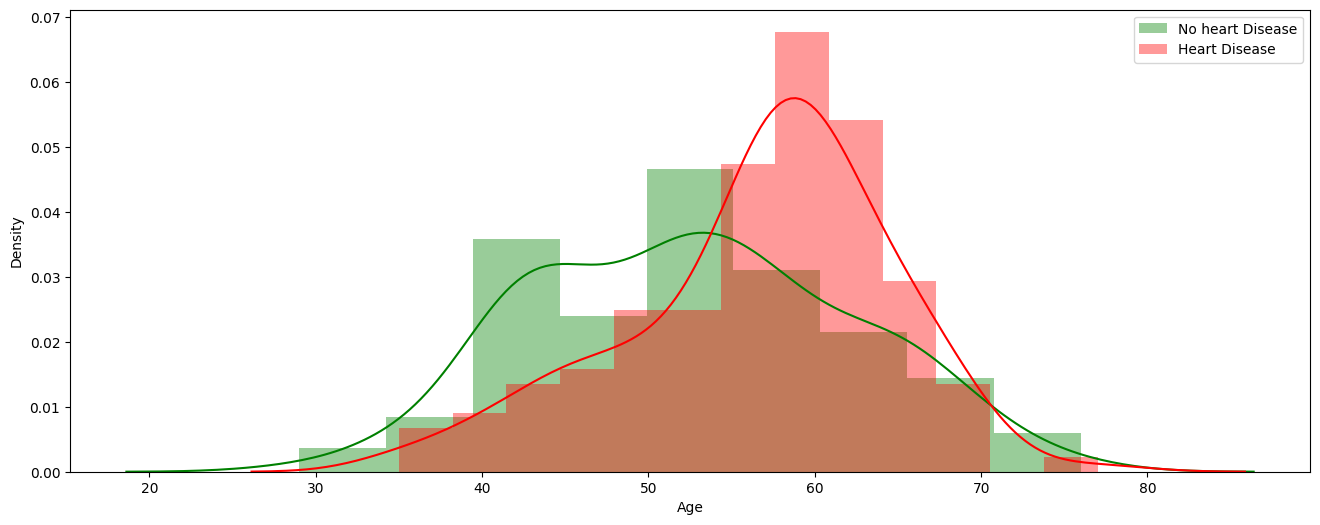

In [15]:
fig=plt.figure(figsize=(16,6))
sns.distplot(data[data['condition'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(data[data['condition'] == 1]["age"], color='red',label='Heart Disease')
plt.ylabel('Density')
plt.xlabel('Age')
plt.legend()
plt.show()


In [16]:
X = data.drop(columns='condition', axis = 1)
Y = data['condition']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
scalar = StandardScaler()
x_train_sc = scalar.fit_transform(x_train)
x_test_sc = scalar.fit_transform(x_test)

# Logistic Regression

In [18]:
model_log = LogisticRegression()
model_log.fit(x_train_sc, y_train)
pred_log = model_log.predict(x_test_sc)
score_log = model_log.score(x_test_sc, y_test)
print(score_log)

0.7333333333333333


In [19]:
print('Classification Report\n', classification_report(y_test, pred_log))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, pred_log)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Accuracy: 73.33%



In [20]:
con_mat = confusion_matrix(y_test, pred_log)
con_mat

array([[23,  9],
       [ 7, 21]], dtype=int64)

# K Nearest Neighbor 

In [21]:
model_knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski')
model_knn.fit(x_train_sc, y_train)
pred_knn = model_knn.predict(x_test_sc)
score_knn = model_knn.score(x_test_sc, y_test)
print(score_knn)

0.75


In [22]:
print('Classification Report\n', classification_report(y_test, pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.78      0.64      0.71        28

    accuracy                           0.75        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60

Accuracy: 75.0%



In [23]:
con_mat = confusion_matrix(y_test, pred_knn)
con_mat

array([[27,  5],
       [10, 18]], dtype=int64)

# Decision Tree

In [24]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_sc, y_train)
pred_dt = model_dt.predict(x_test_sc)
score_dt = model_dt.score(x_test_sc, y_test)
print(score_dt)

0.7


In [25]:
print('Classification Report\n', classification_report(y_test, pred_dt))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, pred_dt)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        32
           1       0.69      0.64      0.67        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60

Accuracy: 70.0%



In [26]:
con_mat = confusion_matrix(y_test, pred_dt)
con_mat

array([[24,  8],
       [10, 18]], dtype=int64)

# Random Forest

In [41]:
model_rf = RandomForestClassifier(n_estimators=11)
model_rf.fit(x_train_sc, y_train)
pred_rf = model_rf.predict(x_test_sc)
score_rf = model_rf.score(x_test_sc, y_test)
print(score_rf)

0.8


In [42]:
print('Classification Report\n', classification_report(y_test, pred_rf))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, pred_rf)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Accuracy: 80.0%



In [43]:
con_mat = confusion_matrix(y_test, pred_rf)
con_mat

array([[26,  6],
       [ 6, 22]], dtype=int64)

# Support Vector Classifier

In [30]:
model_svc = SVC()
model_svc.fit(x_train_sc, y_train)
pred_svc= model_svc.predict(x_test_sc)
score_svc = model_svc.score(x_test_sc,y_test)
print(score_svc)

0.75


In [31]:
print('Classification Report\n', classification_report(y_test, pred_svc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, pred_svc)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

Accuracy: 75.0%



In [32]:
con_mat = confusion_matrix(y_test, pred_svc)
con_mat

array([[24,  8],
       [ 7, 21]], dtype=int64)

In [44]:
scores = [score_log, score_knn, score_dt, score_rf, score_svc]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","Support Vector Classifier"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" = "+str(scores[i]*100)+" %")

The accuracy score achieved using Logistic Regression = 73.33333333333333 %
The accuracy score achieved using K-Nearest Neighbors = 75.0 %
The accuracy score achieved using Decision Tree = 70.0 %
The accuracy score achieved using Random Forest = 80.0 %
The accuracy score achieved using Support Vector Classifier = 75.0 %


In [45]:
import pickle

file = open('random-forest-model.pkl', 'wb')

pickle.dump(model_rf, file)